## Kütüphaneleri Çağırmak


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import struct
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

## GPU Üzerinden Eğitim Yapmak

In [3]:
tf.config.list_physical_devices("GPU")

[]

## Verileri  İncelemek → .png

In [4]:
import numpy as np 
import pandas as pd

import os 
for dirname ,_, filenames in os.walk("/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Segmentation_example_script.m
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/README.txt
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/license.txt
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00929.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00704.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00562.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00237.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00406.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00448.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Ma

## Toplam Veri Sayısına Erişmek → 18000

In [5]:
import os
from sklearn.model_selection import train_test_split

# Veri setindeki tüm dosya yollarını listelemek
image_dir = "/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/"
image_paths = []

for dirname, _, filenames in os.walk(image_dir):
    for filename in filenames:
        if filename.endswith(('.png', '.jpg', '.jpeg')):  # Sadece görüntü dosyalarını seçmek
            image_paths.append(os.path.join(dirname, filename))

print(f"Toplam {len(image_paths)} görüntü bulundu.")

# Tüm görüntülerin sınıflarını elde etmek
labels = [os.path.basename(os.path.dirname(path)) for path in image_paths]

# Sınıf dağılımını görmek için
label_counts = pd.Series(labels).value_counts()

print("Sınıf Dağılımı:")
print(label_counts)

# Tüm sınıflar için veriler eşit dağılıyor.


Toplam 18000 görüntü bulundu.
Sınıf Dağılımı:
Hourse Mackerel          1000
Hourse Mackerel GT       1000
Red Sea Bream            1000
Gilt-Head Bream          1000
Gilt-Head Bream GT       1000
Shrimp                   1000
Shrimp GT                1000
Striped Red Mullet       1000
Striped Red Mullet GT    1000
Trout GT                 1000
Trout                    1000
Red Mullet GT            1000
Red Mullet               1000
Sea Bass GT              1000
Sea Bass                 1000
Black Sea Sprat          1000
Black Sea Sprat GT       1000
Red Sea Bream GT         1000
Name: count, dtype: int64


## Veri Setlerini Taşımak

In [6]:
import os
import shutil

# Orijinal veri seti dizini
base_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'
# Yeni dizin yapısı
new_base_dir = '/kaggle/working'

# Dizin içeriğini kontrol et
print("Dizin içeriği:")
for root, dirs, files in os.walk(base_dir):
    if not dirs:  # Sadece dosyaları içeren dizinleri al
        if files:
            class_name = os.path.basename(root)  # Dizin ismini al
            class_new_dir = os.path.join(new_base_dir, class_name)
            os.makedirs(class_new_dir, exist_ok=True)  # Yeni dizin oluştur
            for img in files:
                if img.endswith(('.png', '.jpg')):  # Görüntü uzantıları
                    src = os.path.join(root, img)
                    dst = os.path.join(class_new_dir, img)
                    shutil.copy(src, dst)  # Görüntüyü kopyala
                    # print(f"{src} taşındı.")  # Eğer görmek istersek taşınıp taşınmadığını yorum satırından kaldırabiliriz.
    
print("Görüntüler başarıyla taşındı.")

# Toplam görüntü sayısını yazdır
def count_images(directory):
    total_count = 0
    for root, dirs, files in os.walk(directory):
        total_count += len([img for img in files if img.endswith(('.png', '.jpg'))]) #görüntü formatları
    return total_count

total_images = count_images(new_base_dir)
print(f"Yeni dizinde toplam {total_images} görüntü var.")


Dizin içeriği:
Görüntüler başarıyla taşındı.
Yeni dizinde toplam 18000 görüntü var.


## Veri Setini Bölmek →  (%70 Train, %20 Val, %10 Test)

In [9]:

import os
import shutil
import random

# Mevcut veri seti dizini
base_dir = '/kaggle/working'

# Yeni dizinler (train, val, test)
train_dir = '/kaggle/working/train'
val_dir = '/kaggle/working/val'
test_dir = '/kaggle/working/test'

# Bu dizinleri oluştur
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Veri setini bölme oranları
train_split = 0.7
val_split = 0.2
test_split = 0.1

# Her sınıfı dolaşıp, görüntüleri ayırma işlemi
for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)
    
    if os.path.isdir(class_path) and class_name not in ['train', 'val', 'test']:  # Sadece sınıf klasörlerini kontrol et
        # Sınıf için görüntü dosyalarını al
        images = [img for img in os.listdir(class_path) if img.endswith(('.png', '.jpg'))]
        
        # Görüntüleri karıştır (shuffle)
        random.shuffle(images)
        
        # Her sınıf için train, val, test setleri için sınırları belirle
        total_images = len(images)
        train_count = int(total_images * train_split)
        val_count = int(total_images * val_split)
        
        # Görüntüleri ayır
        train_images = images[:train_count]
        val_images = images[train_count:train_count + val_count]
        test_images = images[train_count + val_count:]
        
        # Her set için hedef klasörü oluştur
        train_class_dir = os.path.join(train_dir, class_name)
        val_class_dir = os.path.join(val_dir, class_name)
        test_class_dir = os.path.join(test_dir, class_name)
        
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(val_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)
        
        # Train görüntülerini taşı
        for img in train_images:
            src = os.path.join(class_path, img)
            dst = os.path.join(train_class_dir, img)
            shutil.move(src, dst)
        
        # Val görüntülerini taşı
        for img in val_images:
            src = os.path.join(class_path, img)
            dst = os.path.join(val_class_dir, img)
            shutil.move(src, dst)
        
        # Test görüntülerini taşı
        for img in test_images:
            src = os.path.join(class_path, img)
            dst = os.path.join(test_class_dir, img)
            shutil.move(src, dst)

        # Sınıf dizinini sil
        shutil.rmtree(class_path)

print("Görüntüler başarıyla train, val ve test setlerine bölündü, diğer dosyalar silindi.")


Görüntüler başarıyla train, val ve test setlerine bölündü, diğer dosyalar silindi.


## Taşınan Verilerin Dizindeki Sayısı

In [10]:
import os

# Dizinlerdeki görüntü sayısını hesaplayan fonksiyon
def count_images(directory):
    total_count = 0
    for root, dirs, files in os.walk(directory):
        total_count += len([img for img in files if img.endswith(('.png', '.jpg'))]) # Görüntü formatları
    return total_count

# Train, Val, Test dizinlerinin yolu
train_dir = '/kaggle/working/train'
val_dir = '/kaggle/working/val'
test_dir = '/kaggle/working/test'

# Her bir dizindeki toplam görüntü sayısını yazdır
train_count = count_images(train_dir)
val_count = count_images(val_dir)
test_count = count_images(test_dir)

print(f"Train dizininde toplam {train_count} görüntü var.")
print(f"Val dizininde toplam {val_count} görüntü var.")
print(f"Test dizininde toplam {test_count} görüntü var.")


Train dizininde toplam 12600 görüntü var.
Val dizininde toplam 3600 görüntü var.
Test dizininde toplam 1800 görüntü var.


## Verileri Çoğaltmak Ve Görselleştirmek

* Bu işlemi overfitting'i önlemek için yaptım: Overfitting → Modelin verileri genelleyerek aşırı öğrenmesine sebep olur bu yüzden accuracy değerimiz yüksek görünürken predict işleminde yeteri kadar iyi sonuç elde edilmez.

* Bu işlem biraz fazla sürebilir çünkü train,test,val içerisindeki sınıfların her birinin içindeki görüntüleri sağa ve sola çevirerek aynı dizin içerisinde çoğaltıyoruz.(Yaklaşık 45 Dakika Sürdü)

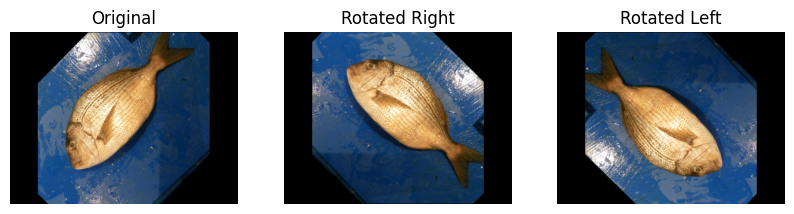

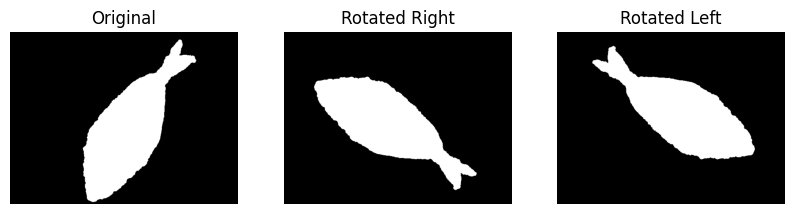

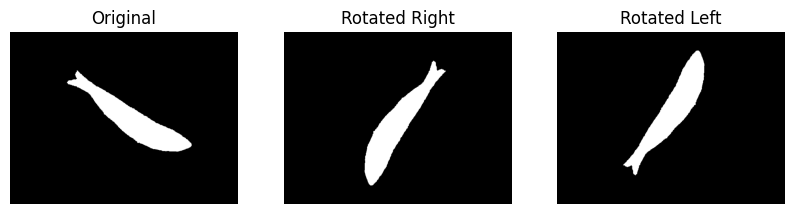

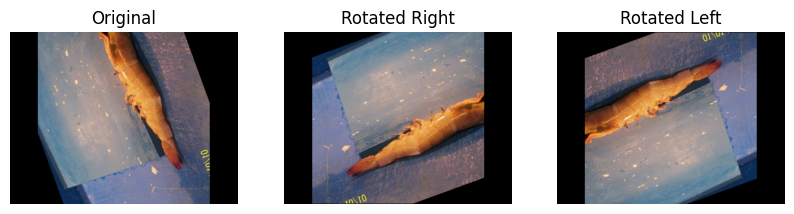

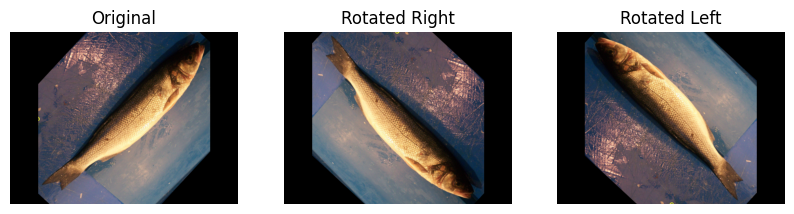

In [12]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Görüntü çoğaltma fonksiyonu (sağa ve sola döndürme)
def augment_and_save_image(image_path, save_dir):
    image = Image.open(image_path)
    
    # Orijinal görüntüyü kaydetme (kopyalamaya gerek yok, zaten mevcut)
    original_image = image.copy()

    # Görüntüyü sağa döndür (90 derece)
    rotated_right = image.rotate(-90)
    right_save_path = os.path.join(save_dir, os.path.splitext(os.path.basename(image_path))[0] + "_rotated_right.png")
    rotated_right.save(right_save_path)

    # Görüntüyü sola döndür (90 derece)
    rotated_left = image.rotate(90)
    left_save_path = os.path.join(save_dir, os.path.splitext(os.path.basename(image_path))[0] + "_rotated_left.png")
    rotated_left.save(left_save_path)

    return original_image, rotated_right, rotated_left

# Görüntü çoğaltmayı her dizin için uygula
def augment_images_in_directory(base_dir):
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith(('.png', '.jpg')):
                image_path = os.path.join(root, file)
                augment_and_save_image(image_path, root)

# Örnek görselleri göstermek için
def display_augmented_images(base_dir, num_samples=5):
    # Rastgele 5 görüntü seç
    image_paths = []
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith(('.png', '.jpg')):
                image_paths.append(os.path.join(root, file))
    
    random_images = random.sample(image_paths, num_samples)
    
    # Orijinal ve döndürülmüş görüntüleri göster
    for img_path in random_images:
        original_image, rotated_right, rotated_left = augment_and_save_image(img_path, os.path.dirname(img_path))
        
        plt.figure(figsize=(10, 5))
        
        # Orijinal görüntü
        plt.subplot(1, 3, 1)
        plt.imshow(original_image)
        plt.title("Original")
        plt.axis('off')

        # Sağa döndürülmüş görüntü
        plt.subplot(1, 3, 2)
        plt.imshow(rotated_right)
        plt.title("Rotated Right")
        plt.axis('off')

        # Sola döndürülmüş görüntü
        plt.subplot(1, 3, 3)
        plt.imshow(rotated_left)
        plt.title("Rotated Left")
        plt.axis('off')
        
        plt.show()

# Train, Val ve Test dizinlerine uygulama
train_dir = '/kaggle/working/train'
val_dir = '/kaggle/working/val'
test_dir = '/kaggle/working/test'

# Her dizindeki görüntüleri çoğalt
augment_images_in_directory(train_dir)
augment_images_in_directory(val_dir)
augment_images_in_directory(test_dir)

# Örnek görüntüleri görselleştirme (rastgele 5 görüntü)
display_augmented_images(train_dir, num_samples=5)


## Çoğaltılan Verilerle Birlikte Veri Sayısı → 54000

* Train görüntüsü sayısı: 12600
* Validation görüntüsü sayısı: 3600
* Test görüntüsü sayısı: 1800
* Çoğaltılmadan Önceki Verilerin sayısı buydu: 18000

* Yeni Train görüntüsü sayısı: 41484
* Yeni Validation görüntüsü sayısı: 10800
* Yeni Test görüntüsü sayısı: 5400
* Çoğaltılan verilerle birlikte toplam veri sayısı: Yaklaşık 58000

In [13]:
import os

# Dizinlerdeki görüntü sayısını hesaplayan fonksiyon
def count_images(directory):
    total_count = 0
    for root, dirs, files in os.walk(directory):
        total_count += len([img for img in files if img.endswith(('.png', '.jpg'))]) # Görüntü formatları
    return total_count
# jpg yazmamın nedeni kontrol amaçlı

# Train, Val, Test dizinlerinin yolu
train_dir = '/kaggle/working/train'
val_dir = '/kaggle/working/val'
test_dir = '/kaggle/working/test'

# Her bir dizindeki toplam görüntü sayısını yazdır
train_count = count_images(train_dir)
val_count = count_images(val_dir)
test_count = count_images(test_dir)

print(f"Train dizininde toplam {train_count} görüntü var.")
print(f"Val dizininde toplam {val_count} görüntü var.")
print(f"Test dizininde toplam {test_count} görüntü var.")


Train dizininde toplam 41484 görüntü var.
Val dizininde toplam 10800 görüntü var.
Test dizininde toplam 5400 görüntü var.


## Dizinleri Tanımlamak

* Öncelikle veri dizinlerimizi tanımlıyoruz. Veriler, train, val (validation) ve test dizinlerinde yer alıyor:

In [ ]:
train_dir = '/kaggle/working/train'
val_dir = '/kaggle/working/val'
test_dir = '/kaggle/working/test'

## Görüntü Boyutu ve Batch Size Ayarlarlamak

* Görüntülerin boyutunu 28x28 olarak seçtik ve her batch'te 32 görüntü işlemeyi planlıyoruz.

In [ ]:
img_size = (28, 28)
batch_size = 32

## ImageDataGenerator Kullanarak Veri Ön İşlemek

* Verilerimizi normalize etmek için ImageDataGenerator kullanıyoruz. Bu işlem, görüntülerin her bir piksel değerini 0 ile 1 arasında ölçekliyor (rescale=1./255). Her bir veri seti (train, val, test) için ayrı bir generator oluşturuyoruz.

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

## Verileri Yükleme

* flow_from_directory fonksiyonu ile verilerimizi yükleyerek, modelin öğrenmesi için uygun hale getiriyoruz. Verileri categorical (çok sınıflı) olarak işliyoruz

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, ...)
val_generator = val_datagen.flow_from_directory(val_dir, ...)
test_generator = test_datagen.flow_from_directory(test_dir, ...)

## Sınıf Sayısını Belirlemek

* Veri setimizdeki sınıfları belirlemek için train_generator.class_indices kullanarak sınıf sayısını alıyoruz. Bu, çıktı katmanında kullanacağımız sınıf sayısını belirlememize yardımcı oluyor.

In [ ]:
num_classes = len(train_generator.class_indices)

## ANN Modelinin Oluşturulması

* Modelimizi Sequential yapı ile oluşturuyoruz. Aşağıdaki gibi tamamen bağlı (dense) katmanlar kullanıyoruz:

* İlk olarak, giriş verisini düzleştiriyoruz (Flatten), çünkü ANN modelleri giriş olarak düzleştirilmiş (flat) veri alır.
* Üç tane gizli katman ekleyerek 512, 256, 128 nöronlu katmanlar oluşturuyoruz.
* Dropout ile overfitting'i önlemeye çalışıyoruz.
* Çıkış katmanı olarak softmax aktivasyon fonksiyonu ile sınıf sayısı kadar nöron ekliyoruz.

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28, 3)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))


## Modelin Derlenmesi

* Modeli derlerken Adam optimizer kullanıyoruz.
  
*  Çok sınıflı sınıflandırma için categorical_crossentropy loss fonksiyonunu ve accuracy metriğini seçiyoruz.

In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Early Stopping Kullanmak

* Aşırı öğrenmeyi (overfitting) önlemek için early stopping kullanıyoruz. Eğer modelin doğrulama kaybı (val_loss) 5 epoch boyunca iyileşmezse eğitim duracak ve en iyi ağırlıklar geri yüklenecek.

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

## Model Eğitimi

* Modeli 50 epoch boyunca eğitiyoruz, ancak early stopping devreye girerse daha erken durabilir. Eğitim sırasında doğrulama verisi ile modelin başarımını izliyoruz.

In [ ]:
results = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

## Performans Metrikleri Ve Tablo Oluşturulması

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')


In [ ]:
# Test seti üzerindeki performansı değerlendirme
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')

# Eğitim ve doğrulama kayıplarını çiz
plt.plot(results.history['loss'], label='Eğitim Loss')
plt.plot(results.history['val_loss'], label='Doğrulama Loss')
plt.title('Eğitim ve Doğrulama Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluğunu çiz
plt.plot(results.history['accuracy'], label='Eğitim Accuracy')
plt.plot(results.history['val_accuracy'], label='Doğrulama Accuracy')
plt.title('Eğitim ve Doğrulama Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Tüm Eğitimi Tek Kodla Yapmak

* Ayrı kod bloklarında yaptığımda hatalarla karşılaştığımdan hepsini tek bir blokta yazarak birleştirdim.

Found 41484 images belonging to 19 classes.
Found 10800 images belonging to 19 classes.
Found 5400 images belonging to 19 classes.
Sınıf Sayısı: 19
Epoch 1/100
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 395s 301ms/step - accuracy: 0.2569 - loss: 2.0692 - val_accuracy: 0.4158 - val_loss: 1.4774
Epoch 2/100
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 327s 251ms/step - accuracy: 0.4359 - loss: 1.4668 - val_accuracy: 0.5352 - val_loss: 1.2207
Epoch 3/100
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 360s 277ms/step - accuracy: 0.5008 - loss: 1.3119 - val_accuracy: 0.5666 - val_loss: 1.1851
Epoch 4/100
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 328s 252ms/step - accuracy: 0.5476 - loss: 1.2100 - val_accuracy: 0.5910 - val_loss: 1.0932
Epoch 5/100
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 357s 274ms/step - accuracy: 0.5769 - loss: 1.1352 - val_accuracy: 0.6022 - val_loss: 1.0487
Epoch 6/100
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 347s 247ms/step - accuracy: 0.6029 - loss: 1.0685 - val_accuracy: 0.6519 - val_loss: 0.9584
Epoch 7/100
1297/1297 ━━━━━━━━━━━━━━━━━━━━

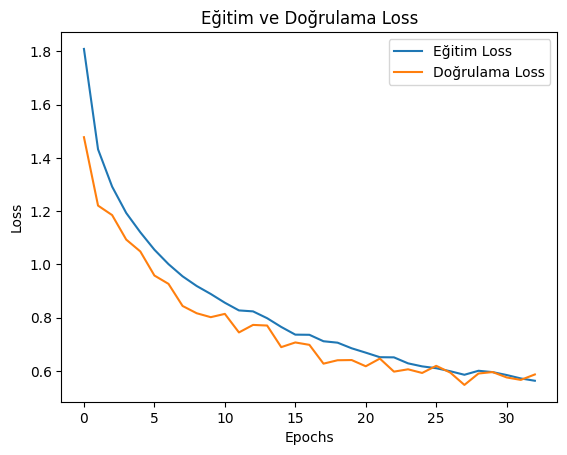

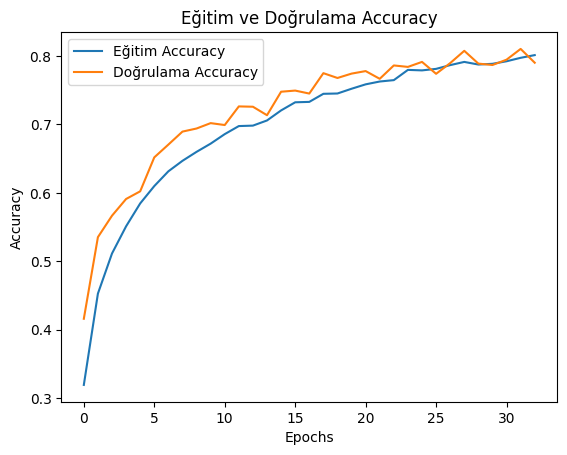

In [35]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


# Eğitim ve doğrulama dizinleri
train_dir = '/kaggle/working/train'
val_dir = '/kaggle/working/val'
test_dir = '/kaggle/working/test'

# Görüntülerin boyutu ve batch size
img_size = (28, 28)
batch_size = 32

# Verileri ön işlemek için ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Eğitim verisini hazırlama
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Doğrulama verisini hazırlama
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Test verisini hazırlama
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Sınıf sayısını kontrol etme
num_classes = len(train_generator.class_indices)
print(f"Sınıf Sayısı: {num_classes}")

# Modeli oluşturma (ANN - Yapay Sinir Ağı)
model = tf.keras.models.Sequential()

# Giriş katmanı: Görüntüleri düzleştiriyoruz (28x28 boyutunda giriş)
model.add(tf.keras.layers.Flatten(input_shape=(28, 28, 3)))

# Gizli katmanlar
model.add(tf.keras.layers.Dense(512, activation='relu'))  # 1. Gizli katman
model.add(tf.keras.layers.Dropout(0.3))  # Dropout ile overfitting'i önleme

model.add(tf.keras.layers.Dense(256, activation='relu'))  # 2. Gizli katman
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(128, activation='relu'))  # 3. Gizli katman
model.add(tf.keras.layers.Dropout(0.3))

# Çıktı katmanı: Sınıf sayısına göre çıktı (softmax ile)
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# Modeli derleme
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Early stopping (aşırı öğrenmeyi önlemek için)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # İzlenecek metrik 
    patience=5,          # val_loss iyileşmezse 5 epoch sonra durdur
    restore_best_weights=True,  # En iyi modelin ağırlıklarını geri yükle
    verbose=1
)

# Modeli eğitme
results = model.fit(
    train_generator,
    epochs=100,  # 50 Epoch yeterli olabilir
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Test seti üzerindeki performansı değerlendirme
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')

# Eğitim ve doğrulama kayıplarını çiz
plt.plot(results.history['loss'], label='Eğitim Loss')
plt.plot(results.history['val_loss'], label='Doğrulama Loss')
plt.title('Eğitim ve Doğrulama Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluğunu çiz
plt.plot(results.history['accuracy'], label='Eğitim Accuracy')
plt.plot(results.history['val_accuracy'], label='Doğrulama Accuracy')
plt.title('Eğitim ve Doğrulama Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

* Model 33. epoch'ta early stopping ile durduruldu.

## Modelin h5 uzantısını kaydetmek

In [38]:
# Modeli belirli bir path'e kaydetme
model.save('/kaggle/working/model.h5')


## Neden Bu Yapıları Seçtim?

* Dropout Katmanları: Overfitting'i önlemek için dropout ekledik.
* Veri Çoğaltma: Daha önceden edindiğim data_augmentation tekniklerini kullanarak overfitting yani genelleme ve aşırı öğrenmeyi minimum seviyeye getirmek için veri setini 3 kat arttırmayı düşündüm buna bağlı olarak epoch sayısını da yüksek tutmak istedim.
* Early Stopping: Eğitim süresince aşırı öğrenmenin önüne geçmek amacıyla early stopping kullandık.
* Softmax Aktivasyonu: Multi-class sınıflandırma için çıkış katmanında softmax kullandık.